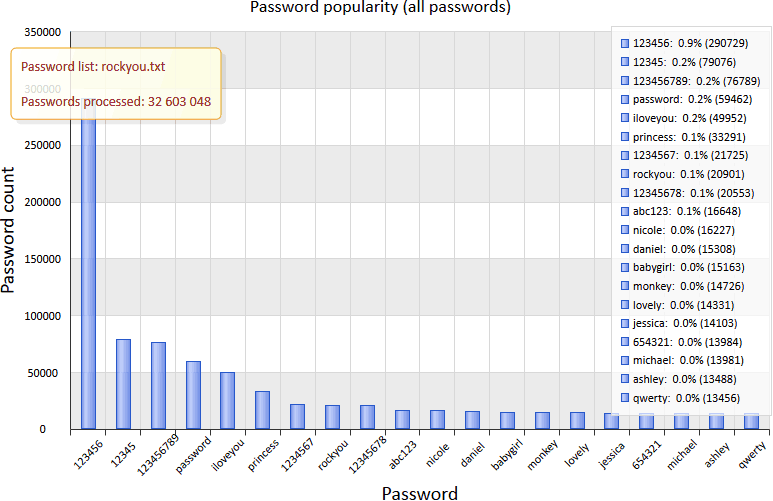

In [1]:

from IPython.display import Image
Image(filename='popular.png')

In [2]:
import numpy as np
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [3]:
# filenames = 'rockyou_1.txt'
# data=open(filenames, 'r',encoding="utf8",errors='ignore').read()
# with open('rockyou_dataset.txt', 'w' , encoding = "utf-8") as file:
#     file.write(data)
    
new_data = open('rockyou.txt' , 'rt' , encoding = "utf-8" , errors = 'ignore').read()
filenm='lstm_char.txt'

In [4]:
#new_data

In [5]:
#Process data and calculate indexes
chars = list(set(new_data))
data_size, X_size = len(new_data), len(chars)
print("data has %d characters, %d unique" % (data_size, X_size))
char_to_idx = {ch:i for i,ch in enumerate(chars)}
idx_to_char = {i:ch for i,ch in enumerate(chars)}

data has 139835759 characters, 710 unique


In [6]:
data_size

139835759

In [7]:
X_size

710

In [8]:
char_to_idx

{'ぽ': 0,
 '☼': 1,
 'Ó': 2,
 'B': 3,
 '２': 4,
 '▬': 5,
 'E': 6,
 'ם': 7,
 'ษ': 8,
 'م': 9,
 '∆': 10,
 'ا': 11,
 'π': 12,
 '+': 13,
 '˓': 14,
 'ต': 15,
 '\x1a': 16,
 '\\': 17,
 'Ò': 18,
 'Ā': 19,
 '<': 20,
 'べ': 21,
 'ω': 22,
 'ว': 23,
 'င': 24,
 '๙': 25,
 '尐': 26,
 '¦': 27,
 '寯': 28,
 'æ': 29,
 'َ': 30,
 '♂': 31,
 '๋': 32,
 'ؤ': 33,
 'ó': 34,
 'ร': 35,
 'š': 36,
 'ô': 37,
 'ပ': 38,
 'â': 39,
 'က': 40,
 'ל': 41,
 'ª': 42,
 'ｼ': 43,
 '存': 44,
 '¯': 45,
 'ེ': 46,
 'ﾁ': 47,
 'ً': 48,
 '̀': 49,
 '）': 50,
 'מ': 51,
 'ÿ': 52,
 'Ҿ': 53,
 'Å': 54,
 'ℓ': 55,
 'г': 56,
 'c': 57,
 'N': 58,
 '保': 59,
 'စ': 60,
 '?': 61,
 'ད': 62,
 'Ë': 63,
 'ן': 64,
 'ơ': 65,
 'Ž': 66,
 '5': 67,
 'X': 68,
 'Ç': 69,
 'İ': 70,
 'Ł': 71,
 'ฝ': 72,
 'e': 73,
 'ち': 74,
 'H': 75,
 'L': 76,
 '♦': 77,
 'Е': 78,
 '年': 79,
 'พ': 80,
 'ؘ': 81,
 '³': 82,
 '๐': 83,
 '=': 84,
 'ě': 85,
 'ฏ': 86,
 '\x08': 87,
 'פ': 88,
 'ɮ': 89,
 'ท': 90,
 '西': 91,
 'ק': 92,
 'q': 93,
 '£': 94,
 '•': 95,
 '底': 96,
 'ถ': 97,
 'ع': 98,
 '̃': 99,
 'ئ

In [9]:
idx_to_char

{0: 'ぽ',
 1: '☼',
 2: 'Ó',
 3: 'B',
 4: '２',
 5: '▬',
 6: 'E',
 7: 'ם',
 8: 'ษ',
 9: 'م',
 10: '∆',
 11: 'ا',
 12: 'π',
 13: '+',
 14: '˓',
 15: 'ต',
 16: '\x1a',
 17: '\\',
 18: 'Ò',
 19: 'Ā',
 20: '<',
 21: 'べ',
 22: 'ω',
 23: 'ว',
 24: 'င',
 25: '๙',
 26: '尐',
 27: '¦',
 28: '寯',
 29: 'æ',
 30: 'َ',
 31: '♂',
 32: '๋',
 33: 'ؤ',
 34: 'ó',
 35: 'ร',
 36: 'š',
 37: 'ô',
 38: 'ပ',
 39: 'â',
 40: 'က',
 41: 'ל',
 42: 'ª',
 43: 'ｼ',
 44: '存',
 45: '¯',
 46: 'ེ',
 47: 'ﾁ',
 48: 'ً',
 49: '̀',
 50: '）',
 51: 'מ',
 52: 'ÿ',
 53: 'Ҿ',
 54: 'Å',
 55: 'ℓ',
 56: 'г',
 57: 'c',
 58: 'N',
 59: '保',
 60: 'စ',
 61: '?',
 62: 'ད',
 63: 'Ë',
 64: 'ן',
 65: 'ơ',
 66: 'Ž',
 67: '5',
 68: 'X',
 69: 'Ç',
 70: 'İ',
 71: 'Ł',
 72: 'ฝ',
 73: 'e',
 74: 'ち',
 75: 'H',
 76: 'L',
 77: '♦',
 78: 'Е',
 79: '年',
 80: 'พ',
 81: 'ؘ',
 82: '³',
 83: '๐',
 84: '=',
 85: 'ě',
 86: 'ฏ',
 87: '\x08',
 88: 'פ',
 89: 'ɮ',
 90: 'ท',
 91: '西',
 92: 'ק',
 93: 'q',
 94: '£',
 95: '•',
 96: '底',
 97: 'ถ',
 98: 'ع',
 99: '̃',
 10

In [10]:
# Constants and hyper-params
H_size = 100 # Size of the hidden layer
T_steps = 10 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning rate
weight_sd = 0.1 # Standard deviation of weights for initialization
z_size = H_size + X_size # Size of concatenate(H, X) vector

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def dsigmoid(y):
    return y * (1 - y)


def tanh(x):
    return np.tanh(x)


def dtanh(y):
    return 1 - y * y

In [12]:
# Parameters
# We use random weights with normal distribution (0, weight_sd) for  tanh  activation function 
# and (0.5, weight_sd) for  sigmoid  activation function.
# Biases are initialized to zeros.
class Param:
    def __init__(self, name, value):
        self.name = name
        self.v = value #parameter value
        self.d = np.zeros_like(value) #derivative
        self.m = np.zeros_like(value) #momentum for AdaGrad
        
class Parameters:
    def __init__(self):
        self.W_f = Param('W_f', 
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_f = Param('b_f',
                         np.zeros((H_size, 1)))

        self.W_i = Param('W_i',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_i = Param('b_i',
                         np.zeros((H_size, 1)))

        self.W_C = Param('W_C',
                         np.random.randn(H_size, z_size) * weight_sd)
        self.b_C = Param('b_C',
                         np.zeros((H_size, 1)))

        self.W_o = Param('W_o',
                         np.random.randn(H_size, z_size) * weight_sd + 0.5)
        self.b_o = Param('b_o',
                         np.zeros((H_size, 1)))

        #For final layer to predict the next character
        self.W_v = Param('W_v',
                         np.random.randn(X_size, H_size) * weight_sd)
        self.b_v = Param('b_v',
                         np.zeros((X_size, 1)))
        
    def all(self):
        return [self.W_f, self.W_i, self.W_C, self.W_o, self.W_v,
               self.b_f, self.b_i, self.b_C, self.b_o, self.b_v]
        
parameters = Parameters()

In [13]:
def forward(x, h_prev, C_prev, p = parameters):
    assert x.shape == (X_size, 1)
    assert h_prev.shape == (H_size, 1)
    assert C_prev.shape == (H_size, 1)
    
    z = np.row_stack((h_prev, x))
    f = sigmoid(np.dot(p.W_f.v, z) + p.b_f.v)
    i = sigmoid(np.dot(p.W_i.v, z) + p.b_i.v)
    C_bar = tanh(np.dot(p.W_C.v, z) + p.b_C.v)

    C = f * C_prev + i * C_bar
    o = sigmoid(np.dot(p.W_o.v, z) + p.b_o.v)
    h = o * tanh(C)

    v = np.dot(p.W_v.v, h) + p.b_v.v
    y = np.exp(v) / np.sum(np.exp(v)) #softmax

    return z, f, i, C_bar, C, o, h, v, y

In [14]:
dummyVector = np.random.randn(10, 1)

In [15]:
dummyVector

array([[-1.84167552],
       [ 0.64673399],
       [ 1.05440664],
       [-0.00650086],
       [-0.28448842],
       [-1.19371835],
       [ 0.37548884],
       [-0.29639053],
       [-1.29514156],
       [ 0.82260877]])

In [16]:
sigmoid(dummyVector)

array([[0.13685325],
       [0.6562741 ],
       [0.7416202 ],
       [0.49837479],
       [0.42935372],
       [0.23259457],
       [0.59278461],
       [0.42644009],
       [0.21498382],
       [0.69478983]])

In [17]:
def backward(target, dh_next, dC_next, C_prev,
             z, f, i, C_bar, C, o, h, v, y,
             p = parameters):
    
    assert z.shape == (X_size + H_size, 1)
    assert v.shape == (X_size, 1)
    assert y.shape == (X_size, 1)
    
    for param in [dh_next, dC_next, C_prev, f, i, C_bar, C, o, h]:
        assert param.shape == (H_size, 1)
        
    dv = np.copy(y)
    dv[target] -= 1

    p.W_v.d += np.dot(dv, h.T)
    p.b_v.d += dv

    dh = np.dot(p.W_v.v.T, dv)        
    dh += dh_next
    do = dh * tanh(C)
    do = dsigmoid(o) * do
    p.W_o.d += np.dot(do, z.T)
    p.b_o.d += do

    dC = np.copy(dC_next)
    dC += dh * o * dtanh(tanh(C))
    dC_bar = dC * i
    dC_bar = dtanh(C_bar) * dC_bar
    p.W_C.d += np.dot(dC_bar, z.T)
    p.b_C.d += dC_bar

    di = dC * C_bar
    di = dsigmoid(i) * di
    p.W_i.d += np.dot(di, z.T)
    p.b_i.d += di

    df = dC * C_prev
    df = dsigmoid(f) * df
    p.W_f.d += np.dot(df, z.T)
    p.b_f.d += df

    dz = (np.dot(p.W_f.v.T, df)
         + np.dot(p.W_i.v.T, di)
         + np.dot(p.W_C.v.T, dC_bar)
         + np.dot(p.W_o.v.T, do))
    dh_prev = dz[:H_size, :]
    dC_prev = f * dC
    
    return dh_prev, dC_prev

In [18]:
# Clear gradients before each backward pass
def clear_gradients(params = parameters):
    for p in params.all():
        p.d.fill(0)

In [19]:
# Clip gradients to mitigate exploding gradients
def clip_gradients(params = parameters):
    for p in params.all():
        np.clip(p.d, -1, 1, out=p.d)

In [20]:
#forward propagation to train neural net
def forward_backward(inputs, targets, h_prev, C_prev):
    global paramters
    
    # To store the values for each time step
    x_s, z_s, f_s, i_s,  = {}, {}, {}, {}
    C_bar_s, C_s, o_s, h_s = {}, {}, {}, {}
    v_s, y_s =  {}, {}
    
    # Values at t - 1
    h_s[-1] = np.copy(h_prev)
    C_s[-1] = np.copy(C_prev)
    
    loss = 0
    # Loop through time steps
    assert len(inputs) == T_steps
    for t in range(len(inputs)):
        x_s[t] = np.zeros((X_size, 1))
        x_s[t][inputs[t]] = 1 # Input character
        
        (z_s[t], f_s[t], i_s[t],
        C_bar_s[t], C_s[t], o_s[t], h_s[t],
        v_s[t], y_s[t]) = \
            forward(x_s[t], h_s[t - 1], C_s[t - 1]) # Forward pass
            
        loss += -np.log(y_s[t][targets[t], 0]) # Loss for at t
        
    clear_gradients()

    dh_next = np.zeros_like(h_s[0]) #dh from the next character
    dC_next = np.zeros_like(C_s[0]) #dh from the next character

    for t in reversed(range(len(inputs))):
        # Backward pass
        dh_next, dC_next = \
            backward(target = targets[t], dh_next = dh_next,
                     dC_next = dC_next, C_prev = C_s[t-1],
                     z = z_s[t], f = f_s[t], i = i_s[t], C_bar = C_bar_s[t],
                     C = C_s[t], o = o_s[t], h = h_s[t], v = v_s[t],
                     y = y_s[t])

    clip_gradients()
        
    return loss, h_s[len(inputs) - 1], C_s[len(inputs) - 1]

In [21]:
def generate_next_char(h_prv, C_prv, first_char_idx, sentence_length):
    x = np.zeros((X_size, 1))
    x[first_char_idx] = 1

    h = h_prv
    C = C_prv

    indexes = []
    
    for t in range(sentence_length):
        _, _, _, _, C, _, h, _, p = forward(x, h, C)
        idx = np.random.choice(range(X_size), p=p.ravel())
        x = np.zeros((X_size, 1))
        x[idx] = 1
        indexes.append(idx)

    return indexes

In [22]:
#process the data for sequence length 10
def seq_restriction(text_ip):
    with open ('final_lstm_op.txt' ,'a', encoding = "utf-8") as filehandle:
        with open('lstm_char.txt','r',errors='ignore') as file:
            word = file.readlines()
            for line in word:
                if len(line) == 10:
                    print(line)
                    filehandle.write(line)

In [23]:
# Update the graph and display a sample output
def update_status(inputs, h_prev, C_prev):
    #initialized later
    global plot_iter, plot_loss
    global smooth_loss
    
    # Get predictions for 600 letters with current model

    sample_idx = generate_next_char(h_prev, C_prev, inputs[0], 200)
    txt = ''.join(idx_to_char[idx] for idx in sample_idx)
    #out = [(txt[i:i+10]) for i in range(0, len(txt), 10)]
    #truncate_seq_length = txt[:8] #if len(txt) <= 10 else txt 
    #info = (data[:75] + '..') if len(data) > 75 else data
    
    with open(filenm, 'a',encoding = "utf-8") as filehandle:
        filehandle.write(txt)
    seq_restriction(txt)    
    # Clear and plot
    plt.plot(plot_iter, plot_loss)
    display.clear_output(wait=True)
    plt.show()

    #Print prediction and loss
    print("truncated strings")
    print("---- %s \n----" % (txt, ))
    print("iter %d, loss %f" % (iteration, smooth_loss))

In [24]:
def update_paramters(params = parameters):
    for p in params.all():
        p.m += p.d * p.d # Calculate sum of gradients
        #print(learning_rate * dparam)
        p.v += -(learning_rate * p.d / np.sqrt(p.m + 1e-8))

In [25]:
# To delay the keyboard interrupt and prevent the training from stopping in the middle of an iteration
import signal

class handleInterrupts(object):
    def __enter__(self):
        self.signal_received = False
        self.old_handler = signal.signal(signal.SIGINT, self.handler)

    def handler(self, sig, frame):
        self.signal_received = (sig, frame)
        print('SIGINT received. Delaying KeyboardInterrupt.')

    def __exit__(self, type, value, traceback):
        signal.signal(signal.SIGINT, self.old_handler)
        if self.signal_received:
            self.old_handler(*self.signal_received)

In [26]:
smooth_loss = -np.log(1.0 / X_size) * T_steps

In [27]:
iteration, pointer = 0, 0

# For the graph
plot_iter = np.zeros((0))
plot_loss = np.zeros((0))

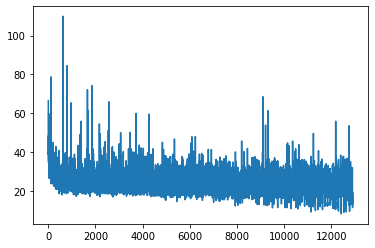

truncated strings
---- 91
110989
54h7nogo
foorner
omachije
baba
ashebiwill
jume1
sanean1
woei05a
eerono1
aliszy
telivas
lovea
jucay
mymanbor
kyney12
nadira
rankeso4
aAANEL
OITYHTd
ERUSBAR

jitkon
stane
buchadin
fyalou
artat 
----
iter 12901, loss 23.511603


In [28]:
# count=0
# for count in range(0,60000):
while True:
    try:
        with handleInterrupts():
            #reset
            if pointer + T_steps >= len(new_data) or iteration == 0:
                g_h_previous = np.zeros((H_size,1))
                g_C_previous = np.zeros((H_size,1))
                pointer = 0
                
            inputs = ([char_to_idx[ch] 
                       for ch in new_data[pointer: pointer + T_steps]])
            
            targets = ([char_to_idx[ch] 
                        for ch in new_data[pointer + 1: pointer + T_steps + 1]])
            loss, g_h_previous, g_C_previous = \
                forward_backward(inputs, targets, g_h_previous, g_C_previous)
            smooth_loss = smooth_loss * 0.999 + loss * 0.001

            # Print every hundred steps
            if iteration % 100 == 0:
                update_status(inputs, g_h_previous, g_C_previous)

            update_paramters()

            plot_iter = np.append(plot_iter, [iteration])
            plot_loss = np.append(plot_loss, [loss])

            pointer += T_steps
            iteration += 1
            #count+=1
            
    except KeyboardInterrupt:
        update_status(inputs, g_h_previous, g_C_previous)
        break

In [29]:
from random import uniform

# Calculate numerical gradient
def calc_numerical_gradient(param, idx, delta, inputs, target, h_prev, C_prev):
    old_val = param.v.flat[idx]
    
    # evaluate loss at [x + delta] and [x - delta]
    param.v.flat[idx] = old_val + delta
    loss_plus_delta, _, _ = forward_backward(inputs, targets,
                                             h_prev, C_prev)
    param.v.flat[idx] = old_val - delta
    loss_mins_delta, _, _ = forward_backward(inputs, targets, 
                                             h_prev, C_prev)
    
    param.v.flat[idx] = old_val #reset

    grad_numerical = (loss_plus_delta - loss_mins_delta) / (2 * delta)
    # Clip numerical error because analytical gradient is clipped
    [grad_numerical] = np.clip([grad_numerical], -1, 1) 
    
    return grad_numerical

In [30]:
# Check gradient of each paramter matrix/vector at `num_checks` individual values
def gradient_check(num_checks, delta, inputs, target, h_prev, C_prev):
    global parameters
    
    # To calculate computed gradients
    _, _, _ =  forward_backward(inputs, targets, h_prev, C_prev)
    
    
    for param in parameters.all():
        #Make a copy because this might get modified
        d_copy = np.copy(param.d)

        # Test num_checks times
        for i in range(num_checks):
            # Pick a random index
            rnd_idx = int(uniform(0, param.v.size))
            
            grad_numerical = calc_numerical_gradient(param,
                                                     rnd_idx,
                                                     delta,
                                                     inputs,
                                                     target,
                                                     h_prev, C_prev)
            grad_analytical = d_copy.flat[rnd_idx]

            err_sum = abs(grad_numerical + grad_analytical) + 1e-09
            rel_error = abs(grad_analytical - grad_numerical) / err_sum
            
            # If relative error is greater than 1e-06 handle it
            if rel_error > 1e-06:
                print('%s (%e, %e) => %e'
                      % (param.name, grad_numerical, grad_analytical, rel_error))

In [31]:
gradient_check(10, 1e-5, inputs, targets, g_h_previous, g_C_previous)#call the function

W_f (-3.257306e-06, -3.257199e-06) => 1.629844e-05
W_f (1.319478e-06, 1.319265e-06) => 8.056745e-05
W_f (5.435652e-08, 5.467493e-08) => 2.893839e-03
W_C (-1.098961e-05, -1.098943e-05) => 8.274664e-06
W_o (-1.308530e-04, -1.308527e-04) => 1.341752e-06
W_v (1.586287e-07, 1.588865e-07) => 8.096046e-04
W_v (-9.965362e-08, -9.964910e-08) => 2.257616e-05
W_v (0.000000e+00, 8.396577e-12) => 8.326661e-03
W_v (3.700151e-07, 3.700254e-07) => 1.385867e-05
W_v (-6.782130e-07, -6.783628e-07) => 1.103267e-04
W_v (-9.645618e-07, -9.647456e-07) => 9.524212e-05
W_v (1.191935e-07, 1.191877e-07) => 2.438156e-05
W_v (-7.299050e-07, -7.298560e-07) => 3.355705e-05
W_v (0.000000e+00, -6.236696e-12) => 6.198041e-03
W_v (1.776357e-10, 4.701196e-11) => 1.066623e-01
b_f (7.863417e-05, 7.863434e-05) => 1.135463e-06
b_f (-1.577405e-07, -1.577850e-07) => 1.405911e-04
b_f (4.431602e-05, 4.431622e-05) => 2.241931e-06
b_C (6.084555e-06, 6.084640e-06) => 7.010799e-06
b_C (3.412168e-05, 3.412124e-05) => 6.561202e-06
b_v